# Data Access Protocol


The Data Access Protocol (DAP) is a standard allowing requests to selected elements of a remote file. The NetCDF library includes support for DAP, which makes accessing remote links as easy as accessing files on disk.

In practice this works fairly well except with two caveats, latency and authorization. Each read operation on the file goes through an http request over the net, which is then processed by a DAP server. Compared to a direct read on the file system, there is often a noticeable lag between a command and the result. This DAP server may also secure some directories, requesting users to provide a authorization in the form of a password, token or certificate.

The main advantage of using DAP is that you don't have to download the entire file. You can open the dataset remotely, access the time slice or the region of interest and make computation on the data.

Some resources:
 * https://pypi.org/project/netcdf4_pydap/
 * https://portal.enes.org/data/data-metadata-service/search-and-download/opendap

In [1]:
%matplotlib inline
import warnings

import netCDF4 as nc
import numpy as np

# Disable NumPy np.bool deprecation warnings, see https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
warnings.filterwarnings("ignore", category=DeprecationWarning)

Here we access a test server that does not require authentication.

In [2]:
url = "http://test.opendap.org:80/opendap/data/nc/20070917-MODIS_A-JPL-L2P-A2007260000000.L2_LAC_GHRSST-v01.nc"
D = nc.Dataset(url)
print(D.ncattrs())
D.variables.keys()

['title', 'DSD_entry_id', 'platform', 'sensor', 'Conventions', 'references', 'institution', 'contact', 'GDS_version_id', 'netcdf_version_id', 'creation_date', 'history', 'product_version', 'spatial_resolution', 'start_date', 'start_time', 'stop_date', 'stop_time', 'northernmost_latitude', 'southernmost_latitude', 'easternmost_longitude', 'westernmost_longitude', 'file_quality_index', 'comment']


dict_keys(['lat', 'lon', 'time', 'sea_surface_temperature', 'sst_dtime', 'proximity_confidence', 'SSES_bias_error', 'SSES_standard_deviation_error', 'rejection_flag', 'confidence_flag', 'sea_surface_temperature4', 'proximity_confidence4', 'SSES_bias_error4', 'SSES_standard_deviation_error4'])

In [3]:
lat = D.variables["lat"][:]
lon = D.variables["lon"][:]
time = D.variables["time"]
print(time.units, time[0], nc.num2date(time[0], time.units))

seconds since 1981-01-01 00:00:00 842832339 2007-09-17 00:05:39


In [4]:
sst = D.variables["sea_surface_temperature"]
print(sst.long_name)
print(sst.units)
print(sst.dimensions, sst.shape)

sea surface temperature
kelvin
('time', 'nj', 'ni') (1, 2030, 1354)


In [5]:
a = sst[:]

This dataset is problematic because it is entirely masked. We need to extract the data attribute to get to the original, unmasked values.

In [6]:
a.data

array([[[ -3575.,  -3529.,  -3483., ...,  -5279.,  -5268.,  -5239.],
        [ -3636.,  -3657.,  -3527., ...,  -5264.,  -5231.,  -5224.],
        [ -3669.,  -3703.,  -3696., ...,  -5270.,  -5284.,  -5243.],
        ...,
        [ -4451.,  -5568.,  -7066., ..., -32767., -32767., -32767.],
        [ -4392.,  -4950.,  -6888., ..., -32767., -32767., -32767.],
        [ -4524.,  -4661.,  -5933., ..., -32767., -32767., -32767.]]],
      dtype=float32)

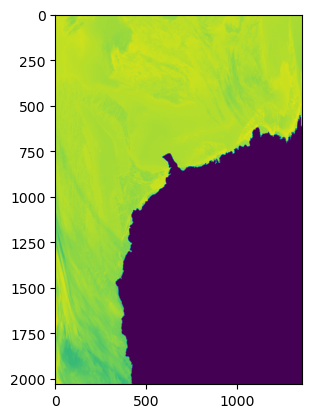

In [7]:
from matplotlib import pyplot as plt

plt.imshow(a.data[0])
plt.show()